In [79]:
import pandas as pnd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [66]:
from sklearn.datasets import fetch_california_housing

In [67]:
dataset=fetch_california_housing();
print(dataset.feature_names);
print(dataset.target_names);

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [68]:
housing=pnd.DataFrame(dataset.data,columns=dataset.feature_names);#dataframe mein convert kiya such that we can take X.Btw yeh sirf features hain ,target nahin hai included.
print(housing.head());
print(housing.tail());
print(housing.isnull().sum());#tells kitne null values hain in each column

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717   1.162264      1387.0

In [69]:
X=housing.iloc[:,:].values;
print(X[0]);

[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]


In [70]:
price=pnd.DataFrame(dataset.target,columns=dataset.target_names);
print(price.tail());

       MedHouseVal
20635        0.781
20636        0.771
20637        0.923
20638        0.847
20639        0.894


In [71]:
y=price.iloc[:,:].values;
print(y);

[[4.526]
 [3.585]
 [3.521]
 ...
 [0.923]
 [0.847]
 [0.894]]


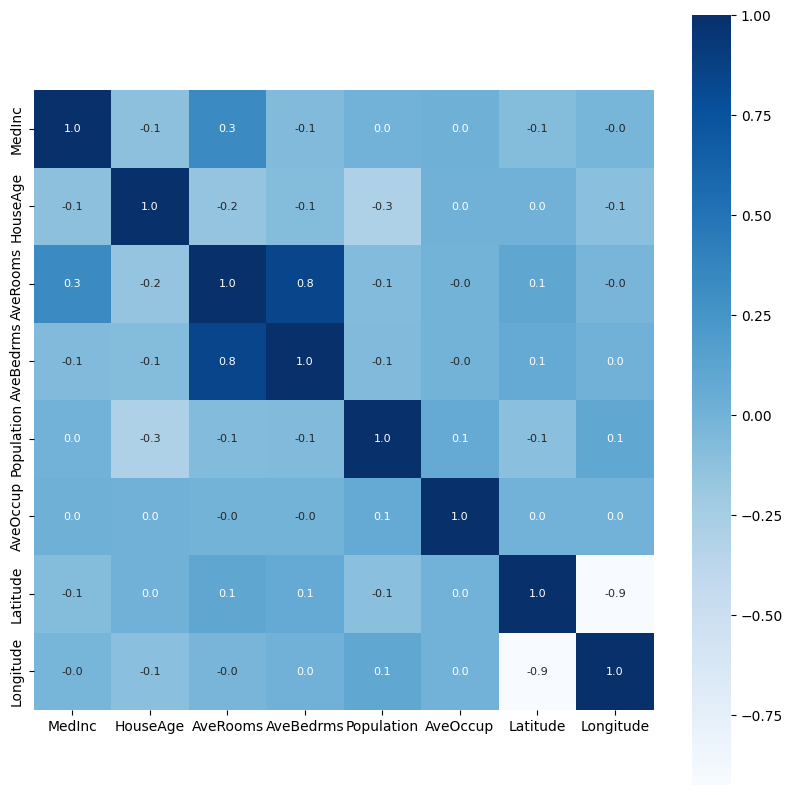

In [84]:
correlation=housing.corr();
plt.figure(figsize=(10,10));
sns.heatmap(correlation,fmt='.1f',cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Blues');#to see kar saathe kar kemon correlation mane konta barle konta ome ba bare.

In [72]:

from sklearn.model_selection import train_test_split;
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.15);

In [73]:
from sklearn.preprocessing import StandardScaler;
sc=StandardScaler();
X_train=sc.fit_transform(X_train);
X_test=sc.transform(X_test);

In [88]:
# from xgboost import XGBRegressor;
# regressor=XGBRegressor();
# regressor.fit(X_train,y_train);
!pip install catboost
from catboost import CatBoostRegressor
regressor = CatBoostRegressor()
regressor.fit(X_train, y_train)

Learning rate set to 0.06438
0:	learn: 1.1126156	total: 14.7ms	remaining: 14.7s
1:	learn: 1.0756998	total: 37ms	remaining: 18.5s
2:	learn: 1.0408015	total: 60ms	remaining: 20s
3:	learn: 1.0081524	total: 71.8ms	remaining: 17.9s
4:	learn: 0.9779121	total: 87.5ms	remaining: 17.4s
5:	learn: 0.9504014	total: 106ms	remaining: 17.5s
6:	learn: 0.9260657	total: 126ms	remaining: 17.9s
7:	learn: 0.9021626	total: 145ms	remaining: 18s
8:	learn: 0.8809216	total: 168ms	remaining: 18.5s
9:	learn: 0.8591138	total: 191ms	remaining: 18.9s
10:	learn: 0.8401434	total: 215ms	remaining: 19.3s
11:	learn: 0.8218551	total: 251ms	remaining: 20.6s
12:	learn: 0.8062534	total: 281ms	remaining: 21.3s
13:	learn: 0.7921906	total: 295ms	remaining: 20.8s
14:	learn: 0.7798287	total: 317ms	remaining: 20.8s
15:	learn: 0.7658048	total: 336ms	remaining: 20.7s
16:	learn: 0.7518203	total: 364ms	remaining: 21s
17:	learn: 0.7408772	total: 382ms	remaining: 20.8s
18:	learn: 0.7315141	total: 395ms	remaining: 20.4s
19:	learn: 0.7204

In [89]:
from sklearn.metrics import r2_score;
y_pred=regressor.predict(X_test);
print(r2_score(y_test,y_pred));

0.8566675028274251


In [90]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.9287138	total: 28.2ms	remaining: 4s
7:	learn: 0.9053245	total: 32.2ms	remaining: 3.99s
8:	learn: 0.8836770	total: 36.1ms	remaining: 3.98s
9:	learn: 0.8623219	total: 40.1ms	remaining: 3.97s
10:	learn: 0.8436907	total: 44ms	remaining: 3.96s
11:	learn: 0.8258497	total: 48ms	remaining: 3.95s
12:	learn: 0.8099615	total: 52ms	remaining: 3.95s
13:	learn: 0.7946053	total: 63ms	remaining: 4.44s
14:	learn: 0.7807080	total: 67.9ms	remaining: 4.46s
15:	learn: 0.7686855	total: 71.8ms	remaining: 4.42s
16:	learn: 0.7561171	total: 76ms	remaining: 4.39s
17:	learn: 0.7449266	total: 80.1ms	remaining: 4.37s
18:	learn: 0.7356660	total: 84ms	remaining: 4.33s
19:	learn: 0.7270358	total: 87.9ms	remaining: 4.31s
20:	learn: 0.7187167	total: 91.8ms	remaining: 4.28s
21:	learn: 0.7098264	total: 95.7ms	remaining: 4.25s
22:	learn: 0.7006847	total: 99.7ms	remaining: 4.24s
23:	learn: 0.6911207	total: 104ms	remaining: 4.21s
24:	learn: 0.6831436	total: 107ms